In [1]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import tensorflow as tf

In [3]:
data_title = pd.read_csv("df_bow_title.csv")
data_tags = pd.read_csv("df_bow_tags.csv")

In [4]:
data_title=data_title.drop(['Unnamed: 0'], axis=1)
data_tags=data_tags.drop(['Unnamed: 0'], axis=1)

# Word2Vec 

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def convert_to_tags_list(df):
    return df.apply(lambda x: [df.columns[i] for i in range(len(x)) if x[i] != 0], axis=1).tolist()

tags_list = convert_to_tags_list(data_tags)

# Binariser les étiquettes
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(tags_list)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_title, y, test_size=0.2, random_state=42)

# Utiliser OneVsRestClassifier pour multi-label classification
model = OneVsRestClassifier(MultinomialNB(alpha=1.0))
model.fit(X_train, y_train)

# Prédire les tags pour l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))


C:\Users\Beast-Of-War\AppData\Local\Temp\ipykernel_25472\163078154.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.apply(lambda x: [df.columns[i] for i in range(len(x)) if x[i] != 0], axis=1).tolist()


Accuracy: 0.16
                precision    recall  f1-score   support

     algorithm       0.00      0.00      0.00       349
        amazon       0.00      0.00      0.00      1027
       android       0.97      0.33      0.50      2462
       angular       0.97      0.37      0.54       941
        apache       0.00      0.00      0.00       746
           api       1.00      0.02      0.03       985
        arrays       0.50      0.00      0.00       607
           asp       0.79      0.09      0.16       913
authentication       0.00      0.00      0.00       397
           aws       0.00      0.00      0.00       578
         azure       1.00      0.52      0.68       916
          boot       0.72      0.11      0.20       880
        chrome       0.00      0.00      0.00       294
         cloud       0.50      0.00      0.00       847
          code       0.00      0.00      0.00       456
       compose       0.00      0.00      0.00       350
          core       0.81      0

e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


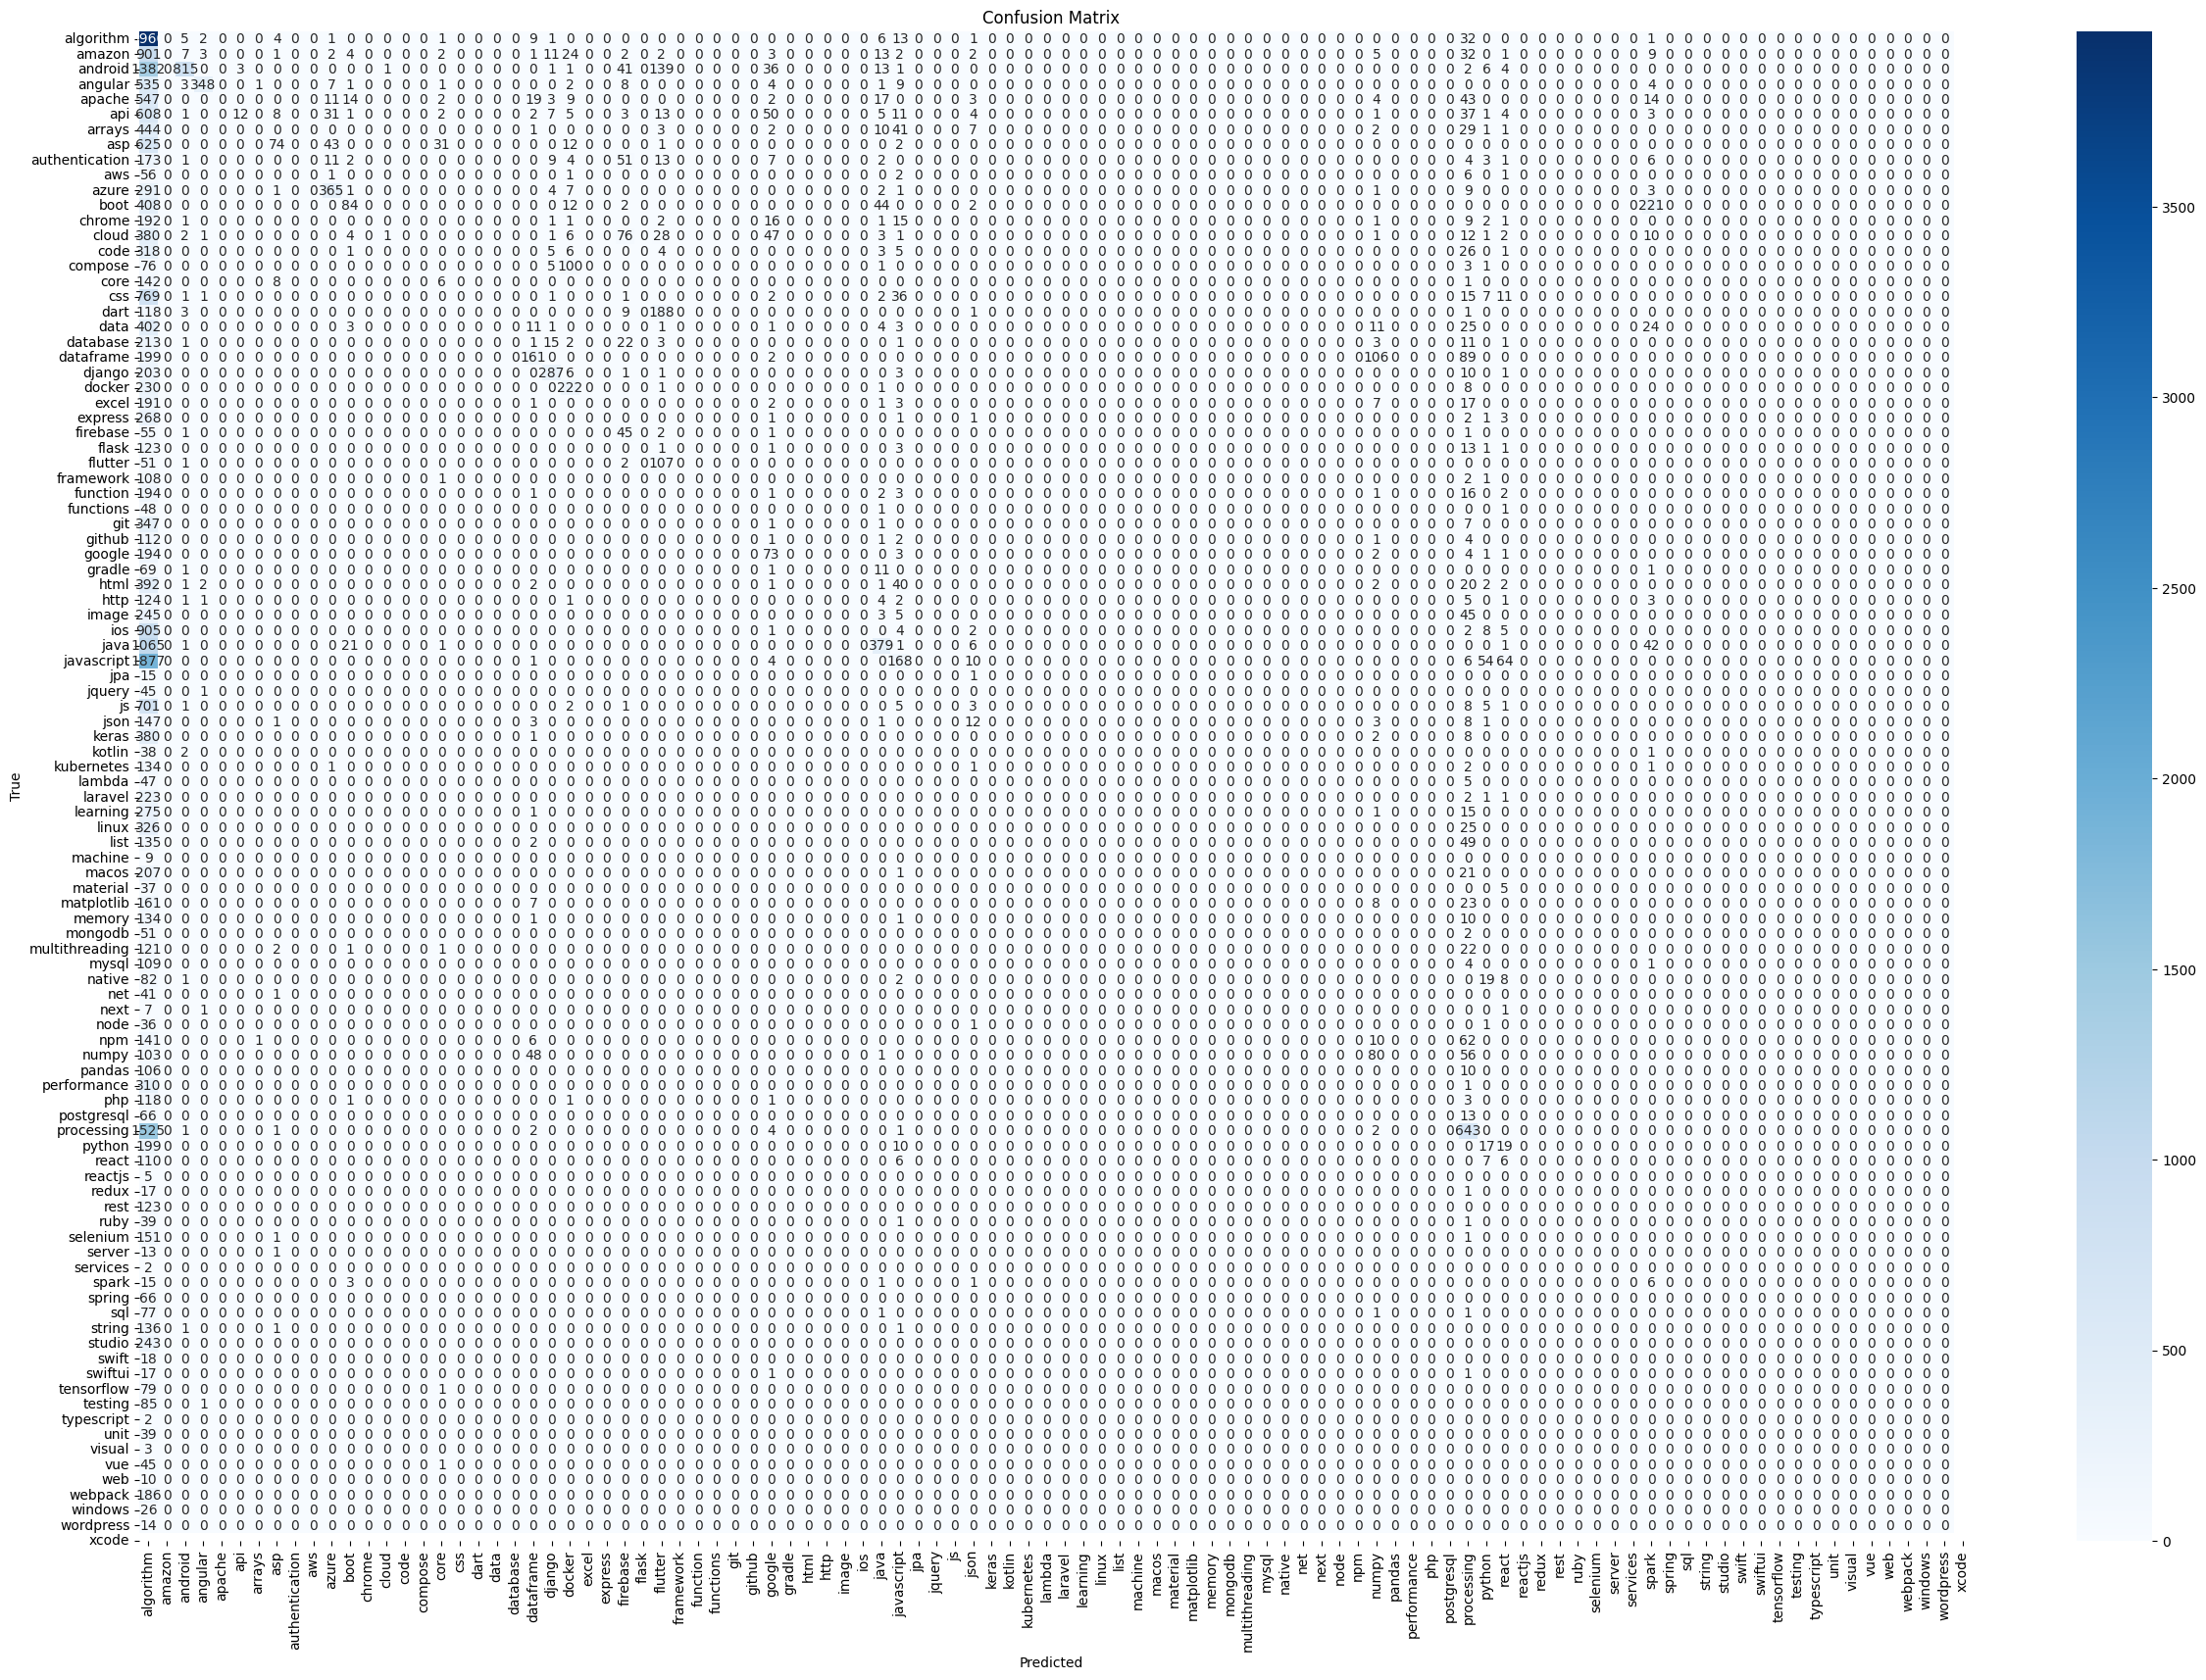

In [16]:
# Tracer la matrice de confusion
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Neural Network

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Création du modèle de réseau de neurones
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4329/4329 ━━━━━━━━━━━━━━━━━━━━ 4s 755us/step - accuracy: 0.1206 - loss: 0.1214 - val_accuracy: 0.1883 - val_loss: 0.0795
Epoch 2/10
4329/4329 ━━━━━━━━━━━━━━━━━━━━ 3s 726us/step - accuracy: 0.1891 - loss: 0.0787 - val_accuracy: 0.1901 - val_loss: 0.0787
Epoch 3/10
4329/4329 ━━━━━━━━━━━━━━━━━━━━ 3s 737us/step - accuracy: 0.1908 - loss: 0.0779 - val_accuracy: 0.1869 - val_loss: 0.0782
Epoch 4/10
4329/4329 ━━━━━━━━━━━━━━━━━━━━ 3s 724us/step - accuracy: 0.1909 - loss: 0.0776 - val_accuracy: 0.1907 - val_loss: 0.0780
Epoch 5/10
4329/4329 ━━━━━━━━━━━━━━━━━━━━ 3s 727us/step - accuracy: 0.1922 - loss: 0.0772 - val_accuracy: 0.1903 - val_loss: 0.0781
Epoch 6/10
4329/4329 ━━━━━━━━━━━━━━━━━━━━ 3s 719us/step - accuracy: 0.1943 - loss: 0.0772 - val_accuracy: 0.1921 - val_loss: 0.0777
Epoch 7/10
4329/4329 ━━━━━━━━━━━━━━━━━━━━ 3s 746us/step - accuracy: 0.1923 - loss: 0.0769 - val_accuracy: 0.1928 - val_loss: 0.0777
Epoch 8/10
4329/4329 ━━━━━━━━━━━━━━━━━━━━ 3s 725us/step - accuracy: 0.1955 - loss: 0.07

In [31]:
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Calculer les métriques
accuracy_adam = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")


1083/1083 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step
Accuracy: 0.17
Classification Report:


In [32]:
if accuracy_adam>accuracy:
    print(classification_report(y_test, y_pred))
    # Tracer la matrice de confusion
    conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    plt.figure(figsize=(30, 20))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# BERT ?

In [19]:
from transformers import BertTokenizer, TFBertForSequenceClassification

# Pas besoin de redéfinir x_train,x_test,y_train,y_test car ils seront les meme que pour Word2Vect

# Tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encodage des textes
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)


e:\Users\Beast-Of-War\miniconda3\envs\hugface\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Beast-Of-War\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [22]:
# Convertir en tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).batch(8)

ValueError: Dimensions 100 and 138523 are not compatible

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(8)
# Charger le modèle BERT
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=y_train.shape[1])
# Compiler le modèle
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# USE ?

In [ ]:
print('oui')